# Multiple instruments

It is quite typical to have RV observations from more than one instrument.
These data should be analysed together for the detection of planets.

<div class="admonition note">
    <div class="admonition-title">Note</div>
    <p style="margin-top: 1em">
        <ul>
        <li>
            Considering RVs from multiple instruments means adding new offset parameters to the model.
            By default, all these parameters share the same prior, but we'll see below how to change this.
        </li>
        <li>
            The same applies to the additional white noise (jitter).
            One jitter parameter is added per instrument, all sharing the same prior.
        </li>
        </ul>
    </p>
</div>

## Detecting the planet around HD106252

First announced by [Fischer et al.
(2002)](https://ui.adsabs.harvard.edu/abs/2002PASP..114..529F/abstract), the
giant planet orbiting HD106252 has been detected with a number of different
instruments (Perrier et al. 2003, Butler et al. 2006, Wittenmyer et al.2009). In
this example, we look at data from ELODIE, HET, HJS, and Lick.

Each of the datasets can be imported like this

In [3]:
from kima.examples.multi_instruments import HD106252_ELODIE

and a simple visualisation of the RVs is provided by the `plot` method

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='BJD - 2400000 [days]', ylabel='RV [m/s]'>)

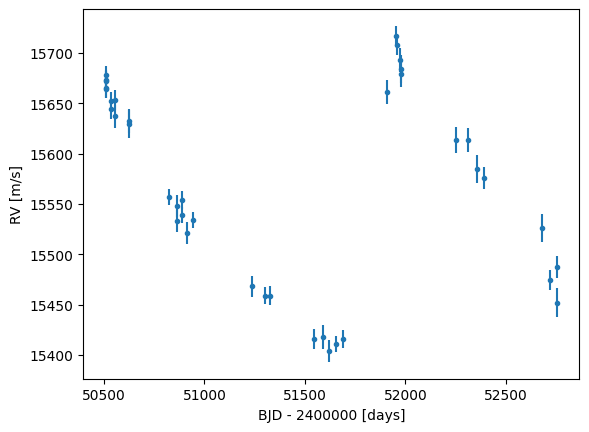

In [4]:
HD106252_ELODIE.plot()

The combined data is also readily available

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='BJD - 2400000 [days]', ylabel='RV [m/s]'>)

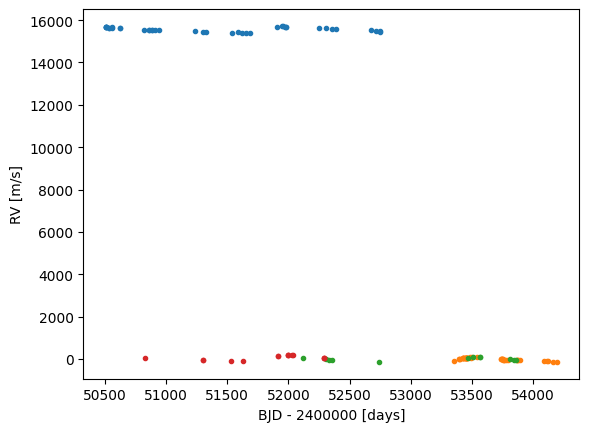

In [5]:
from kima.examples.multi_instruments import HD106252_combined

HD106252_combined.plot()

Note the clear offset between ELODIE data (in blue above) and the other
datasets. The average RV has been subtracted from the HET, HJS, and Lick data,
but not from ELODIE. This slightly convoluted situation is ideal to demonstrate
how **kima** deals with multiple instruments, especially with the default
priors.

We can now use one of the available models to analyse this dataset. We can
either create the model

In [6]:
from kima import RVmodel

model = RVmodel(fix=False, npmax=1, data=HD106252_combined)

or import the `multi_instruments` function from the examples, which does the same
thing (but can also run the model directly)

In [7]:
from kima.examples import multi_instruments

model = multi_instruments(run=False)

Notice how we set the number of planets to be _free_, implicitly assigning to it
a uniform prior between 0 and 1 (by setting `npmax=1`).

In [8]:
import kima
from kima import RVData, RVmodel
from kima.pykima.utils import get_gaussian_prior_vsys, get_gaussian_priors_individual_offsets

In [6]:
data = RVData(
    [
        "HD106252_ELODIE.txt",
        "HD106252_HET.txt",
        "HD106252_HJS.txt",
        "HD106252_Lick.txt"
    ]
)

In [7]:
data

In [8]:
model = RVmodel(fix=False, npmax=1, data=data)

In [9]:
model.Cprior = get_gaussian_prior_vsys(data)
model.individual_offset_prior = get_gaussian_priors_individual_offsets(data)

In [10]:
model.Cprior